# classification models using tensorflow

In [2]:
#how to avoid overfitting using callback techniques and dropout layers

In [3]:
#dropout layer -> avaoid overfitting

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("C:\\Users\\st\\Documents\\Tensorflow_Keras\\FINAL-TF2-FILES\\TF_2_Notebooks_and_Data\\DATA\\cancer_classification.csv")

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [12]:
#EDA

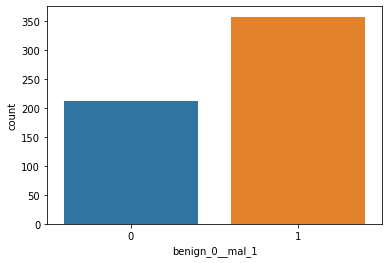

In [14]:
sns.countplot(x='benign_0__mal_1',data=df) #to check balanced data

In [20]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

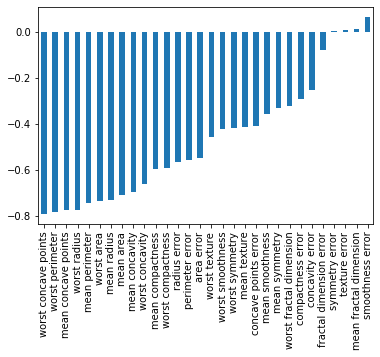

In [27]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

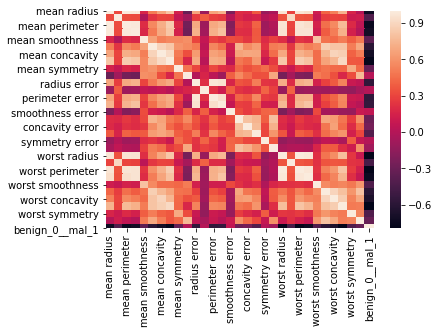

In [28]:
sns.heatmap(df.corr())

In [29]:
X=df.drop('benign_0__mal_1',axis=1).values

In [31]:
y=df['benign_0__mal_1'].values

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler=MinMaxScaler()

In [36]:
X_train=scaler.fit_transform(X_train)

In [37]:
X_test=scaler.transform(X_test)#prevent data leakage

In [39]:
#prevent overfittig 

In [41]:
from tensorflow.keras.models import Sequential

In [43]:
from tensorflow.keras.layers import Dense,Dropout

In [44]:
X_train.shape

(426, 30)

In [47]:
model =Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION PROBLEM
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [48]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6623 - val_loss: 0.6429
Epoch 2/600
426/426 [==============================] - 0s 120us/sample - loss: 0.6281 - val_loss: 0.6080
Epoch 3/600
426/426 [==============================] - 0s 77us/sample - loss: 0.5880 - val_loss: 0.5653
Epoch 4/600
426/426 [==============================] - 0s 68us/sample - loss: 0.5427 - val_loss: 0.5143
Epoch 5/600
426/426 [==============================] - 0s 61us/sample - loss: 0.4940 - val_loss: 0.4650
Epoch 6/600
426/426 [==============================] - 0s 56us/sample - loss: 0.4455 - val_loss: 0.4159
Epoch 7/600
426/426 [==============================] - 0s 56us/sample - loss: 0.4019 - val_loss: 0.3729
Epoch 8/600
426/426 [==============================] - 0s 56us/sample - loss: 0.3635 - val_loss: 0.3375
Epoch 9/600
426/426 [==============================] - 0s 54us/sample - loss: 0.3322 - val_loss: 0.3060
Epoch 10/600
426/4

426/426 [==============================] - 0s 56us/sample - loss: 0.0571 - val_loss: 0.1189
Epoch 79/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0560 - val_loss: 0.1179
Epoch 80/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0568 - val_loss: 0.1169
Epoch 81/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0690 - val_loss: 0.1191
Epoch 82/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0605 - val_loss: 0.1173
Epoch 83/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0560 - val_loss: 0.1213
Epoch 84/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0535 - val_loss: 0.1170
Epoch 85/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0551 - val_loss: 0.1101
Epoch 86/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0561 - val_loss: 0.1295
Epoch 87/600
426/426 [==============================] - 0s 59us/samp

426/426 [==============================] - 0s 59us/sample - loss: 0.0420 - val_loss: 0.1281
Epoch 156/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0444 - val_loss: 0.1247
Epoch 157/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0418 - val_loss: 0.1326
Epoch 158/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0423 - val_loss: 0.1168
Epoch 159/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0435 - val_loss: 0.1230
Epoch 160/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0417 - val_loss: 0.1270
Epoch 161/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0417 - val_loss: 0.1246
Epoch 162/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0409 - val_loss: 0.1334
Epoch 163/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0405 - val_loss: 0.1232
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 68us/sample - loss: 0.0341 - val_loss: 0.1412
Epoch 233/600
426/426 [==============================] - 0s 92us/sample - loss: 0.0371 - val_loss: 0.1355
Epoch 234/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0343 - val_loss: 0.1399
Epoch 235/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0348 - val_loss: 0.1281
Epoch 236/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0372 - val_loss: 0.1334
Epoch 237/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0384 - val_loss: 0.1312
Epoch 238/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0355 - val_loss: 0.1442
Epoch 239/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0329 - val_loss: 0.1283
Epoch 240/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0330 - val_loss: 0.1329
Epoch 241/600
426/426 [==============================] - ETA

426/426 [==============================] - 0s 59us/sample - loss: 0.0268 - val_loss: 0.1384
Epoch 310/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0274 - val_loss: 0.1363
Epoch 311/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0273 - val_loss: 0.1471
Epoch 312/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0300 - val_loss: 0.1470
Epoch 313/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0280 - val_loss: 0.1375
Epoch 314/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0432 - val_loss: 0.1667
Epoch 315/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0311 - val_loss: 0.1406
Epoch 316/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0276 - val_loss: 0.1494
Epoch 317/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0294 - val_loss: 0.1298
Epoch 318/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 61us/sample - loss: 0.0236 - val_loss: 0.1474
Epoch 387/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0236 - val_loss: 0.1520
Epoch 388/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0224 - val_loss: 0.1582
Epoch 389/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0233 - val_loss: 0.1599
Epoch 390/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0216 - val_loss: 0.1553
Epoch 391/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0213 - val_loss: 0.1635
Epoch 392/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0233 - val_loss: 0.1516
Epoch 393/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0218 - val_loss: 0.1572
Epoch 394/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0240 - val_loss: 0.1618
Epoch 395/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 59us/sample - loss: 0.0209 - val_loss: 0.1599
Epoch 464/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0191 - val_loss: 0.1763
Epoch 465/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0208 - val_loss: 0.1819
Epoch 466/600
426/426 [==============================] - 0s 57us/sample - loss: 0.0183 - val_loss: 0.1661
Epoch 467/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0204 - val_loss: 0.1639
Epoch 468/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0196 - val_loss: 0.1891
Epoch 469/600
426/426 [==============================] - 0s 62us/sample - loss: 0.0240 - val_loss: 0.1634
Epoch 470/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0186 - val_loss: 0.1772
Epoch 471/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0171 - val_loss: 0.1783
Epoch 472/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 63us/sample - loss: 0.0164 - val_loss: 0.1847
Epoch 541/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0143 - val_loss: 0.1836
Epoch 542/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0152 - val_loss: 0.1850
Epoch 543/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0144 - val_loss: 0.2112
Epoch 544/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0141 - val_loss: 0.1852
Epoch 545/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0135 - val_loss: 0.1965
Epoch 546/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0139 - val_loss: 0.1880
Epoch 547/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0140 - val_loss: 0.1988
Epoch 548/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0147 - val_loss: 0.1999
Epoch 549/600
426/426 [==============================] - 0s 

In [49]:
losses=pd.DataFrame(model.history.history)

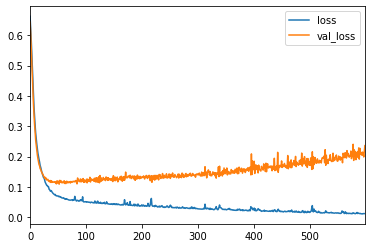

In [50]:
losses.plot()

In [51]:
#callbacks based on your validation loss

In [52]:
model =Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION PROBLEM
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t